### 1.1.1 Пример
Проведем прямую y = mx + b через экспериментальные точки

0.9999999999999999 -0.9499999999999995


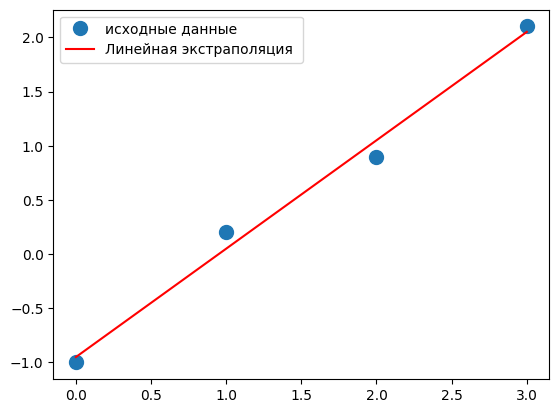

In [1]:
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# Перепишем линейное уравнение y = mx + C как y = Ap, где А = [[ x 1 ]] и p = [[m], [c]]
# Построим A по Х:

A = np.vstack([x,np.ones(len(x))]).T
A # print забыли

# Используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

# Построим график полученной прямой и укажем на нем точки
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label = 'исходные данные', markersize= 10)

plt.plot(x, m*x + c, 'r',label = 'Линейная экстраполяция ')
plt.legend()
plt.show()

### 1.1.2 Пример
Пусть x, y – вектора длиной n > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты поринома a, b, c по методу наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла

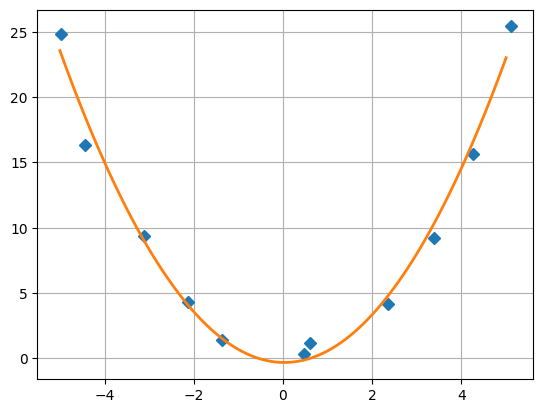

In [2]:
from numpy import *
from numpy.random import *

# генерируем случайные x и y
delta = 1.0
x = linspace(-5,5,11)
y = x**2 + delta * (rand(11) - 0.5)
x+= delta * (rand(11) - 0.5)

# записывае данные в файл
x.tofile('files/x_data.txt','\n')
y.tofile('files/y_data.txt','\n')

# читаем данные из файлов
x = fromfile('files/x_data.txt', float, sep='\n')
y = fromfile('files/y_data.txt', float, sep='\n')

# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# задаем вектор m = [X**2, x, E]
m = vstack((x**2,x,ones(11))).T

# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m,y,rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)

# рисуем точки
plt.plot(x,y,'D')

# рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], '-', lw = 2)
plt.grid()
plt.savefig("files/парабола.png")

### 1.1.3 Пример
По данным предыдущего примера постройте эстраполяционного полинома третьего порядка

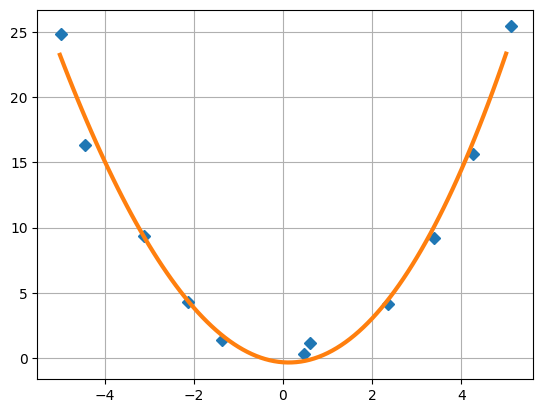

In [3]:
# Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# задаем вектор m = [x**3, x**2, x, E]
m = vstack((x**3, x**2, x, ones(11))).T

# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)

# рисуем точки
plt.plot(x, y, 'D')

# рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig('files/полином 3-й степени.png')

### Задание
Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени

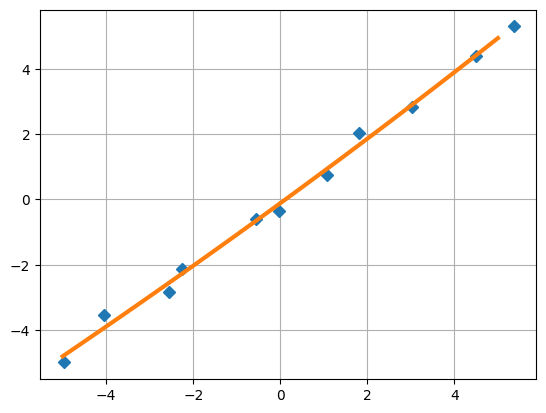

In [4]:
delta = 1.0
x = linspace(-5,5,11)
y = x + delta * (rand(11) - 0.5)
x+= delta * (rand(11) - 0.5)

m = vstack((x**3, x**2, x, ones(11))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x,y,'D')

plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw = 3)
plt.grid()

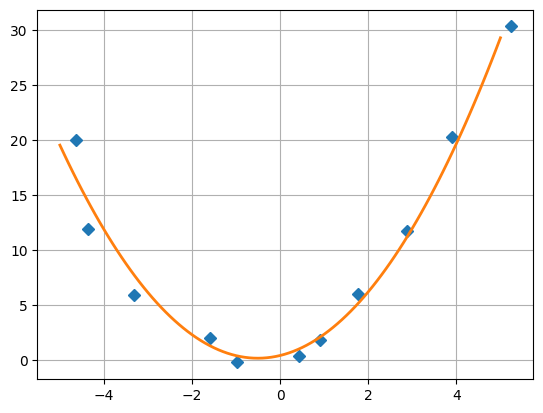

In [5]:
delta = 1.0
x = linspace(-5,5,11)
y = x**2 + x + delta * (rand(11) - 0.5)
x+= delta * (rand(11) - 0.5)

m = vstack((x**2, x, ones(11))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x,y,'D')

plt.plot(x_prec, s[0] * x_prec**2 + s[1]*x_prec + s[2], '-', lw = 2)
plt.grid()

### 1.1.4 Пример
Необходимо проверить гипотезу, что наша точечно заданная функция ложится на кривую вида 𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥2)

In [6]:
import scipy as sp
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
# зададим массив из точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt


array([0.27610583, 0.75748715, 0.51209299])

In [7]:
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

1.9142864019361348e-05

In [8]:
# Вычислим квадратичное уравнение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

0.009910050326783474

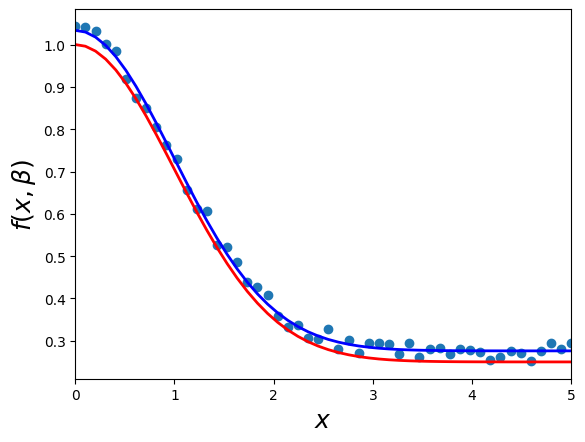

In [9]:
fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

### 1.1.5 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида:

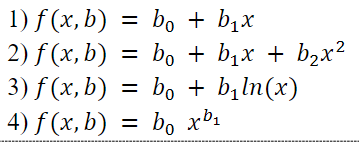

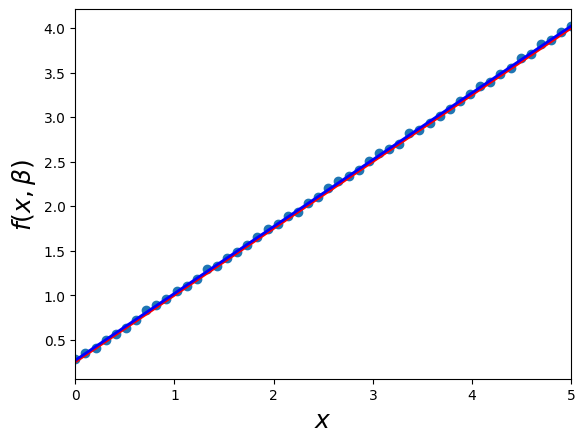

In [10]:
#1
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
# зададим массив из точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

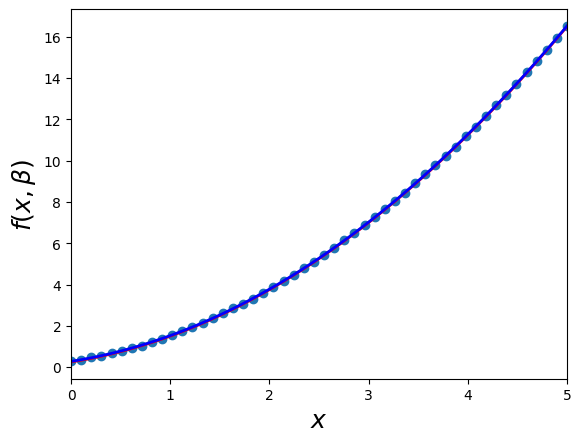

In [11]:
#2
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
# зададим массив из точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

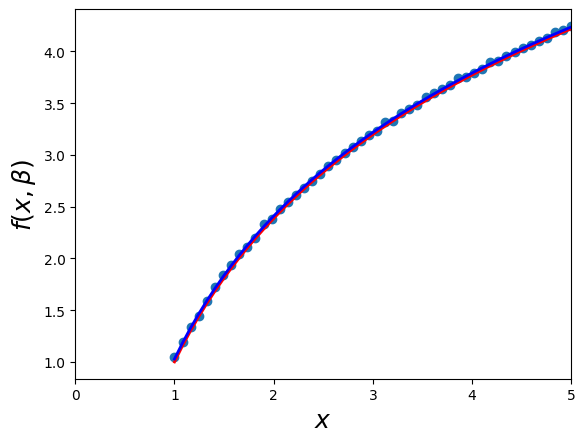

In [12]:
#3
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив из точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

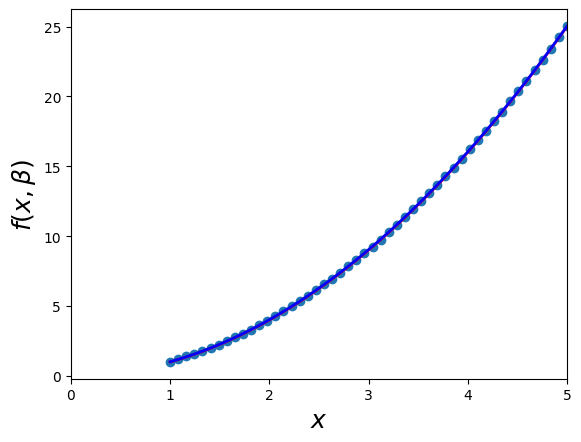

In [13]:
#4
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1
# зададим массив из точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

### Задание
Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

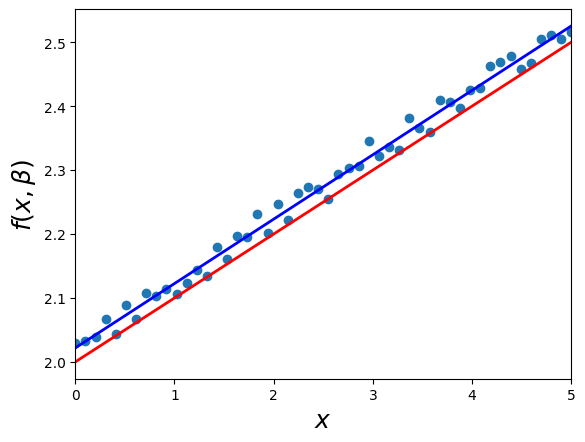

In [14]:
# 1
beta = (2, 0.1)
def f(x,b0,b1):
    return b0 + b1*x

xdata = np.linspace(0,5,50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
beta_opt

lin_dev = sum(beta_cov[0])

residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

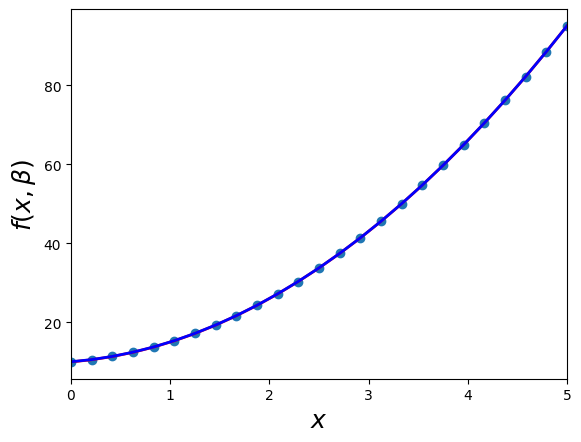

In [15]:
# 2
beta = (10, 2, 3)
def f(x,b0,b1,b2):
    return b0 + b1*x+b2*x*x

xdata = np.linspace(0,5,25)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)

lin_dev = sum(beta_cov[0])

residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

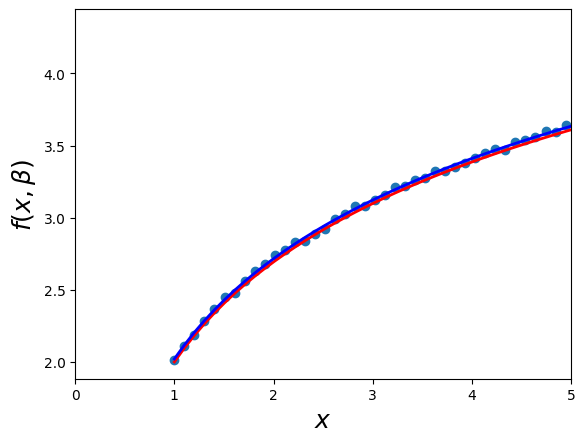

In [16]:
# 3
beta = (2, 1)
def f(x,b0,b1):
    return b0 + b1*np.log(x)

xdata = np.linspace(1,10,90)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)

lin_dev = sum(beta_cov[0])

residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

### 1.2.1 Пример
Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

In [17]:
# Импортируем необходимые библиотеки
# используем pandas и numpy для обработки данных,
# matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
# создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваеимостью
my_dict = {'Учебное время':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
        "Оценка":[10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}



dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [19]:
# Исследуем набор данных
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


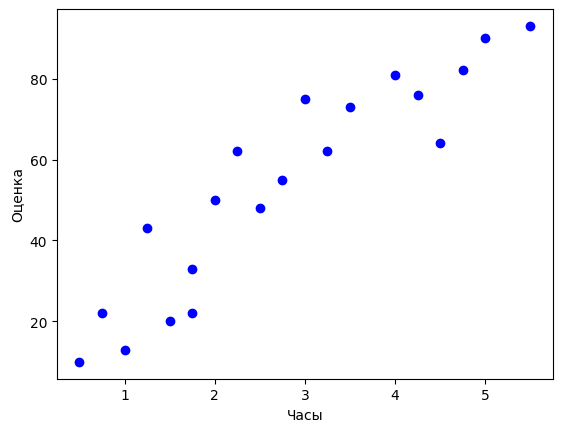

In [20]:
# Нарисуем точечную диаграмму
plt.scatter(dataset["Учебное время"],dataset['Оценка'],color ='b',label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

In [21]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
print(x)
print(y)

# Теперь когда у нас есть атрибуты и метки, необходимо разделить их на a обучающий и тестовый наборы
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 0)

# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
11.564766839378237
[15.64766839]


Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

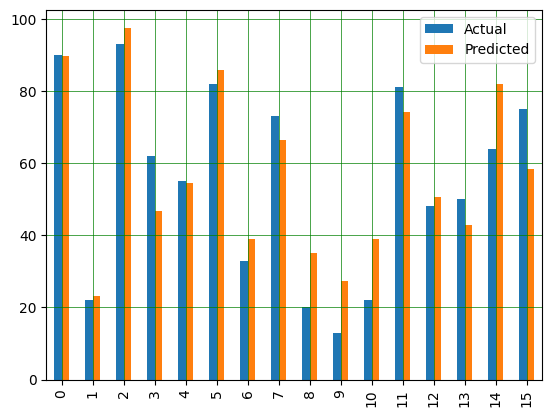

In [22]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})

# визуазилируем результат сравнения в виде гистограммы
df.plot(kind = 'bar')
plt.grid(which='major', linestyle = '-', linewidth ='0.5', color = 'green')
plt.grid(which='minor', linestyle = ':', linewidth ='0.5', color = 'black')
plt.show()

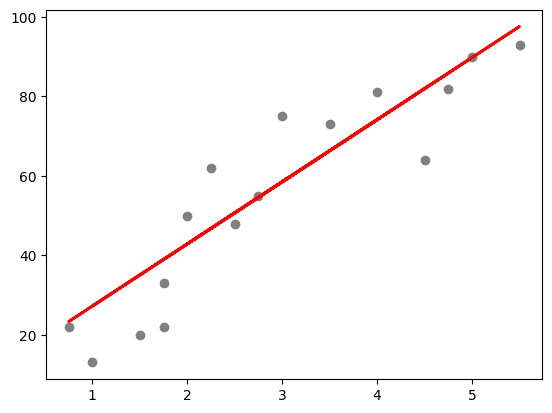

,Actual,Predicted
0,90,89.803109
1,22,23.300518
2,93,97.626943
3,62,46.772021
4,55,54.595855


In [23]:
# построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth=2)
plt.show()
df.head()

### Задание (1.2.1)
Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:

(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).

Найдите коэффициенты линии регрессии. Постройте прогноз.

In [24]:
regressor = LinearRegression()
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataset = pd.read_csv(url)

dataset.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

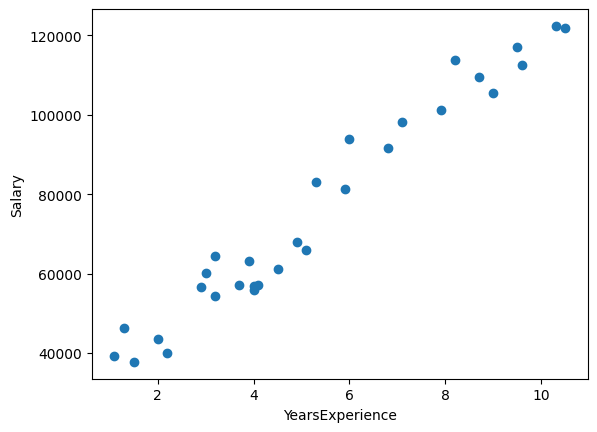

In [ ]:
plt.scatter(dataset['YearsExperience'],dataset["Salary"])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [ ]:
x = dataset.iloc[:,:1].values
y = dataset.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.2)

regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

25310.643959552952
[9985.36322512]


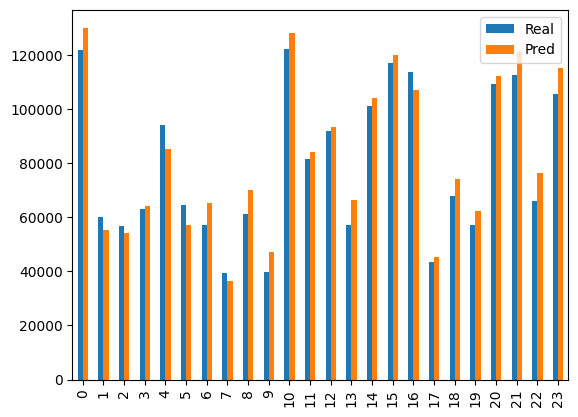

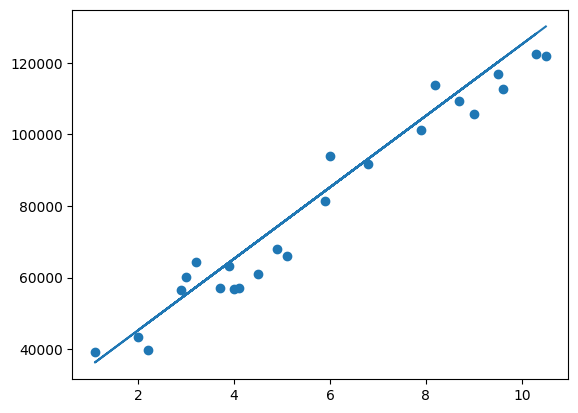

In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Real': y_test, "Pred": y_pred})

df.plot(kind = 'bar')
plt.show()

plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.show()

### 1.3.1 Пример
Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq

In [ ]:
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,4,4,3,1,2,3,4,1,3,9,7]]

X = np.transpose(X)
X = np.c_[X,np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X,y,rcond=None)[0]
print(linreg)

[ 0.13099364  0.26625828 -0.02194925  1.50231509]


Кроме этого можно использовать возможности библиотеки sсikit-learn. Рассмотрим пример.

### 1.3.2 Пример
Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn

In [ ]:
# Импортируем необходимые библиотеки
# используем pandas и numpy для обработки данных,
# matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from  sklearn import metrics

In [ ]:
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,4,4,3,1,2,3,4,1,3,9,7]]

# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns={0:'y'}, inplace= False)
df2 = df2.rename(columns={0:'x1',1:'x2',2:'x3'},inplace= False)

frames = [df1,df2]
dataset = pd.concat([df1,df2], axis=1,join="inner")
print(dataset.head()) # принт

# изучим данные
print(dataset.shape)
dataset.describe()


   y  x1  x2  x3
0  1   0   4   4
1  2   2   1   1
2  3   4   2   2
3  4   1   3   5
4  3   5   4   6
(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,4.913043
std,1.674029,2.404706,2.428422,2.678416
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,4.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [ ]:

# разделим данные на метки и атрибуты
X = dataset[['x1','x2','x3']]
y = dataset['y']

# разделим данные на обучающую и тестовую выборки
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2)

# для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

# выведем коэфициент модели
coeff_df =  pd.DataFrame(regressor.coef_,X.columns, columns=["Coefficient"])
print(coeff_df) # принт

# чтобы сделать прогнозы на тестовых данных, выполните следующй код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
print(df) # принт

# последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя все значения для MSE 
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))

     Coefficient
x1  5.714286e-01
x2 -5.551115e-17
x3 -1.428571e-01
    Actual  Predicted
7        3   4.857143
19       3   4.285714
22       1   2.857143
16       6   3.571429
11       5   3.857143
4        3   3.000000
20       1   4.000000
2        3   3.000000
21       3   2.571429
5        4   2.285714
8        5   5.142857
12       4   5.000000
15       5   4.285714
18       6   3.285714
17       0   3.428571
10       4   1.714286
3        4   0.857143
0        1   0.428571
6        5   2.714286
Mean Squared Error: 3.6412459720730403


### Задание (1.2.1)
Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv

2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

In [ ]:
url1 = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
url2 = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'

db1 = pd.read_csv(url1)
db2 = pd.read_csv(url2)

In [ ]:
db1.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
db1.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
db2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
db2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
x1 = db1.drop("Petrol_Consumption", axis=1)
y1 = db1["Petrol_Consumption"]

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.2)

regressor = LinearRegression()
regressor.fit(X_train1, y_train1)

coeff_df =  pd.DataFrame(regressor.coef_,x1.columns, columns=["Coefficient"])
print(coeff_df)

                              Coefficient
Petrol_tax                     -33.371838
Average_income                  -0.063003
Paved_Highways                  -0.003333
Population_Driver_licence(%)  1362.330111


In [ ]:
y_pred1 = regressor.predict(X_test1)

df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
df1.head()

,Actual,Predicted
42,632,647.168113
11,471,437.010421
28,574,558.559441
43,591,556.126600
19,640,687.423065


In [ ]:
print('Root Mean Squared Error: ', metrics.root_mean_squared_error(y_test1, y_pred1))

Root Mean Squared Error:  42.642560369095904


### Задание*
Задача: Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов

Вариант №8

[[5.  1. ]
 [5.2 1. ]
 [5.4 1. ]
 [5.6 1. ]
 [5.8 1. ]
 [6.  1. ]]
-0.4285714285714271 5.190476190476181


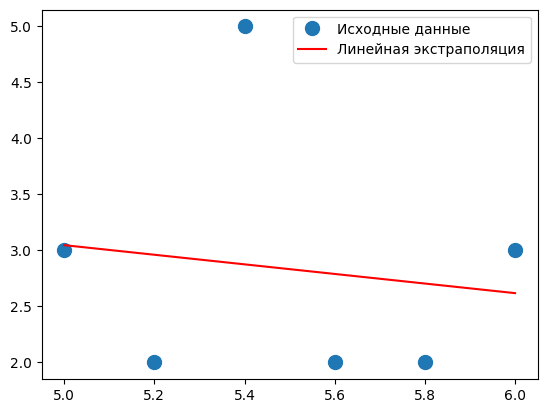

[ -0.89285714   9.39285714 -21.71428571]


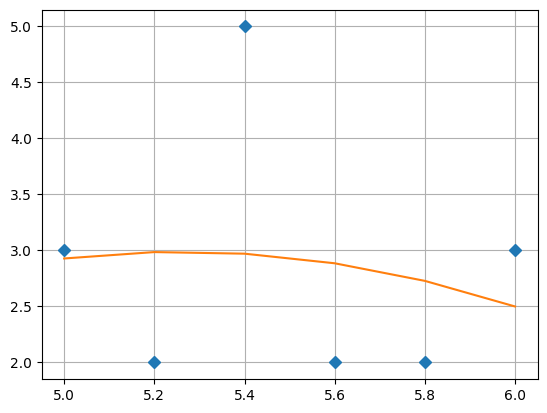

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([3.0, 2.0, 5.0, 2.0, 2.0, 3.0])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

m = np.vstack((x ** 2, x, np.ones(6))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(5, 6, 6)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2])
plt.grid()
print(s)